In [143]:
from utils import plot_data, generate_data
import numpy as np
import matplotlib.pyplot as plt
"""
Documentation:

Function generate() takes as input "A" or "B", it returns X, t.
X is two dimensional vectors, t is the list of labels (0 or 1).    

Function plot_data(X, t, w=None, bias=None, is_logistic=False, figure_name=None)
takes as input paris of (X, t) , parameter w, and bias. 
If you are plotting the decision boundary for a logistic classifier, set "is_logistic" as True
"figure_name" specifies the name of the saved diagram.
"""

def train_logistic_regression(X, t, maxIters, learning_rate):
    """
    Given data, train your logistic classifier.
    Return weight and bias
    """
    losses_train = []
    w =  np.random.uniform(low=-0.5, high=0.5, size=(X.shape[1],1))
    t = t.reshape(X.shape[0], 1)
#     print("asdasd ", w.shape)
    b = 0
    for i in range(maxIters):
#         print(w.shape, "adadsadadfgjjgerglernglekrng")
        y = predict_logistic_regression(X, w, b)
        gradient_w = calc_gradient_w(X, y, t)
        gradient_b = calc_gradient_b(y, t)
#         print("ww", gradient_w.shape)
        w = w - (learning_rate * gradient_w)
        b = b - (learning_rate * gradient_b)

        loss = calc_loss(t, y)
        losses_train.append(loss)


    return w, b, losses_train

def sigmoid(y):
    """
    Calculate the sigmoid function.
    """
    return 1.0 / (1 + np.exp(-y))

def decision_boundary(prob):
  return 1 if prob >= .5 else 0

def classify(predictions):
  decision = np.vectorize(decision_boundary)
  return decision(predictions).flatten()

def predict_logistic_regression(X, w, b):
    """
    Generate predictions by your logistic classifier.
    """
#     print(X.shape, w.shape)
    y = np.dot(X, w) + b
    z = sigmoid(y)
    return z

def calc_gradient_w(X, y, t):
    N = len(X)
    gradient = np.dot(X.T,  y - t)
    gradient /= N
    fd = y - t
#     print("grad size", gradient.shape, "y shape", y.shape, "t shape", t.shape, "fd", fd.shape)
    return gradient

def calc_gradient_b(y, t):
    return np.sum(y - t)

def calc_loss(t, y):
    observations = len(t)

    #Take the error when label=1
    class1_cost = -t*np.log(y)

    #Take the error when label=0
    class2_cost = (1-t)*np.log(1-y)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

def calc_linear_gradient_w(X, y_hat, y, num_samples):
    return (X.T.dot(y_hat - y)) / num_samples

def calc_linear_gradient_b(y_hat, y, num_samples):
    temp = np.ones([num_samples, 1])
    return (temp.T.dot(y_hat - y)) / num_samples

def calc_linear_loss(y_hat, y):
    M = y_hat.shape[0]
    loss = (1 / (2 * M)) * np.sum(np.power((y_hat - y), 2))
    return loss


def train_linear_regression(X, t, maxIters, learning_rate):
    """
    Given data, train your linear regression classifier.
    Return weight and bias
    """
    losses_train = []
    w =  np.random.uniform(low=-0.5, high=0.5, size=(X.shape[1],1))
    t = t.reshape(X.shape[0], 1)
    b = 0
    num_samples = X.shape[0]
    for i in range(maxIters):
        y = predict_linear_regression(X, w, b)
        gradient_w = calc_linear_gradient_w(X, y, t, num_samples)
        gradient_b = calc_linear_gradient_b(y, t, num_samples)
        w = w - (learning_rate * gradient_w)
        b = b - (learning_rate * gradient_b)

        loss = calc_linear_loss(y, t)
        losses_train.append(loss)

    return w, b, losses_train

    return w, b

def predict_linear_regression(X, w, b):
    """
    Generate predictions by your logistic classifier.
    """
    y = np.dot(X, w) + b
    return y

def get_accuracy(t_hat, t):
    """
    Calculate accuracy,
    """
    diff = t_hat - t
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))
    return acc

    

def main():
    # Dataset A
    # Linear regression classifier
    maxIters = 100000
    learning_rate = 0.001
    X, t = generate_data("A")
    
    w, b, losses_train = train_linear_regression(X, t, maxIters, learning_rate)
    b = b[0][0]
    print("shape w", w.shape, "shape b", b.shape, "shape X: ", X.shape)
    y_hat = predict_linear_regression(X, w, b)
    t_hat = classify(y_hat)
    plt.figure()
    plt.title("Linear regression on A")
    plt.plot(losses_train)
    print("Accuracy of linear regression on dataset A:", get_accuracy(t_hat.reshape(X.shape[0], 1), t.reshape(X.shape[0], 1)))
    plot_data(X, t, w, b, is_logistic=False, figure_name='dataset_A_linear.png')

    # logistic regression classifier
    X, t = generate_data("A")
    w, b, losses_train = train_logistic_regression(X, t, maxIters, learning_rate)
    plt.figure()
    plt.title("Logistic regression on A")
    plt.plot(losses_train)
    y_hat = predict_logistic_regression(X, w, b)
    t_hat = classify(y_hat)
    print("Accuracy of logistic regression on dataset A:", get_accuracy(t_hat, t))
    plot_data(X, t, w, b, is_logistic=True, figure_name='dataset_A_logistic.png')
    

    # Dataset B
    # Linear regression classifier
    X, t = generate_data("B")
    w, b, losses_train = train_linear_regression(X, t, maxIters, learning_rate)
    b = b[0][0]
    plt.figure()
    plt.title("Linear regression on B")
    plt.plot(losses_train)
    y_hat = predict_linear_regression(X, w, b)
    t_hat = classify(y_hat)
    print("Accuracy of linear regression on dataset B:", get_accuracy(t_hat.reshape(X.shape[0], 1), t.reshape(X.shape[0], 1)))
    plot_data(X, t, w, b, is_logistic=False, figure_name='dataset_B_linear.png')

    # logistic regression classifier
    X, t = generate_data("B")
    w, b, losses_train = train_logistic_regression(X, t, maxIters, learning_rate)
    plt.figure()
    plt.title("Logistic regression on B")
    plt.plot(losses_train)
    y_hat = predict_logistic_regression(X, w, b)
    t_hat = classify(y_hat)
    print("Accuracy of logistic regression on dataset B:", get_accuracy(t_hat, t))
    plot_data(X, t, w, b, is_logistic=True, figure_name='dataset_B_logistic.png')


shape w (2, 1) shape b () shape X:  (400, 2)
Accuracy of linear regression on dataset A: 0.92
Accuracy of logistic regression on dataset A: 0.92
Accuracy of linear regression on dataset B: 0.75
Accuracy of logistic regression on dataset B: 0.9375


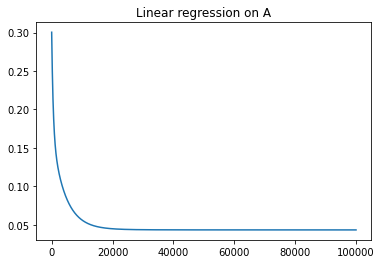

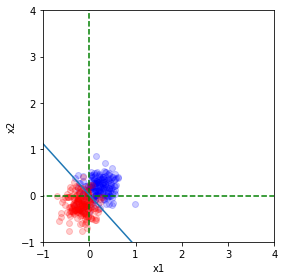

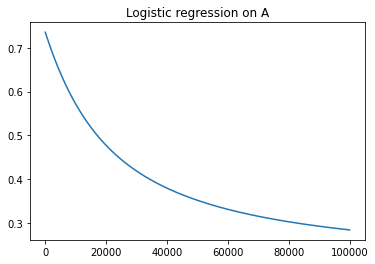

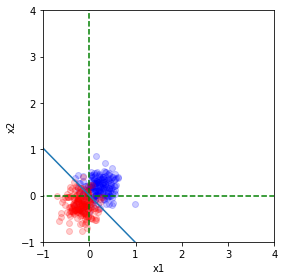

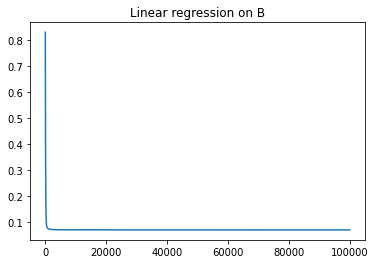

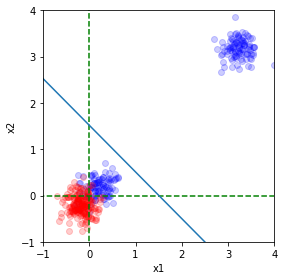

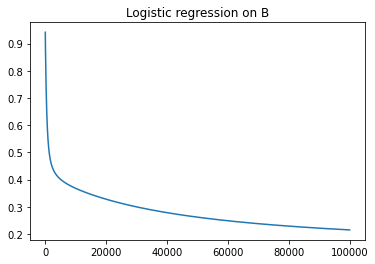

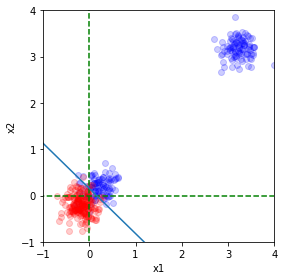

In [144]:
main()